In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [1]:
import os # 모델 저장할 폴더가 있는지 여부와 폴더 생성
import numpy as np
import pandas as pd # get_dummies, crosstab
import seaborn as sns # iris 데이터 가져오기
from sklearn import datasets # iris 데이터 (X,y) 가져오기
from sklearn.preprocessing import LabelEncoder # 라벨인코더
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU
from tensorflow.keras import metrics # compile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt

- 데이터셋 생성(seaborn) & 전처리
    X,y(라벨인코딩-원핫인코딩)분리 -> train과 test셋 분리(8:2)
- 모델 구성(입력4 -> 출력3, layer5: 4->64->128->50->30->3)
- 모델 학습과정 설정
- 모델 학습(EarlyStopping, ModelCheckpoint 추가)
- 모델평가(시각화, 현재모델과 저장된 최고의 모델 평가, 교차표==혼동행렬)
- 모델예측/저장

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X_iris = iris.iloc[:,:-1].values
y_iris = iris.iloc[:,-1]
X_iris,y_iris

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [7]:
Y_iris = pd.get_dummies(y_iris).to_numpy()
Y_iris

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [8]:
X_iris, Y_iris

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_iris,Y_iris,
                                                    train_size= 0.8,
                                                    stratify=Y_iris,
                                                    random_state=12)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [ ]:
# 층화 추출했는지 확인 
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

In [ ]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

# 2. 모델 구성
(입력4 -> 출력3, layer5: 4->64->128->50->30->3)

In [11]:
model = Sequential()
model.add(Dense(units=64, input_dim=4, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                6450      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0

# 3. 모델 학습과정 설정

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습
(Earlystopping, ModelCheckpoint추가)

In [13]:
model_save_folder = './model/'
import os
if not os.path.exists(model_save_folder): # 폴더 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder \
        + 'iris-{epoch:03d}-loss{val_loss:.4f}-acc{val_accuracy:.4f}.h5'
# 콜백객체
checkpoint = ModelCheckpoint(
                    filepath=file,
                    monitor='val_accuracy', # 모니터링 지표:loss, val_loss, accuracy
                    save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                    mode = 'max',
                    verbose=1) # 로그 출력 여부
earlystopping = EarlyStopping(patience=40)# monitor='val_loss' 기본값
hist=model.fit(X_train,Y_train,batch_size=40,
               epochs=200,
               validation_split=0.2,
               callbacks=[checkpoint,earlystopping])

Epoch 1/200
1/3 [=========>....................] - ETA: 0s - loss: 1.1632 - accuracy: 0.3000
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to ./model\iris-001-loss0.9736-acc0.6667.h5
3/3 [==============================] - 1s 120ms/step - loss: 1.1070 - accuracy: 0.3646 - val_loss: 0.9736 - val_accuracy: 0.6667
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0515 - accuracy: 0.3500
Epoch 2: val_accuracy did not improve from 0.66667
3/3 [==============================] - 0s 10ms/step - loss: 1.0591 - accuracy: 0.4271 - val_loss: 0.9091 - val_accuracy: 0.6667
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0458 - accuracy: 0.4000
Epoch 3: val_accuracy did not improve from 0.66667
3/3 [==============================] - 0s 11ms/step - loss: 1.0293 - accuracy: 0.4479 - val_loss: 0.8674 - val_accuracy: 0.6667
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.8946 - accuracy: 0.6750
Epoch 4: val_accuracy did not i

3/3 [==============================] - 0s 12ms/step - loss: 0.3224 - accuracy: 0.8750 - val_loss: 0.1893 - val_accuracy: 1.0000
Epoch 30/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9000
Epoch 30: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 12ms/step - loss: 0.2758 - accuracy: 0.8854 - val_loss: 0.1784 - val_accuracy: 1.0000
Epoch 31/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9250
Epoch 31: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 12ms/step - loss: 0.2334 - accuracy: 0.9062 - val_loss: 0.1679 - val_accuracy: 0.9583
Epoch 32/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8250
Epoch 32: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.1608 - val_accuracy: 0.9583
Epoch 33/200
1/3 [=========>....................] 

3/3 [==============================] - 0s 9ms/step - loss: 0.1775 - accuracy: 0.9167 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 60/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8750
Epoch 60: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.2162 - accuracy: 0.8958 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 61/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9000
Epoch 61: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.1942 - accuracy: 0.9167 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 62/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1482 - accuracy: 0.9250
Epoch 62: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 7ms/step - loss: 0.2031 - accuracy: 0.8958 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 63/200
1/3 [=========>....................] - 

3/3 [==============================] - 0s 13ms/step - loss: 0.1266 - accuracy: 0.9479 - val_loss: 0.0778 - val_accuracy: 0.9583
Epoch 90/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1028 - accuracy: 0.9750
Epoch 90: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.1586 - accuracy: 0.9479 - val_loss: 0.0707 - val_accuracy: 0.9583
Epoch 91/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1521 - accuracy: 0.9750
Epoch 91: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.1241 - accuracy: 0.9792 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 92/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1470 - accuracy: 0.9250
Epoch 92: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.1660 - accuracy: 0.9375 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 93/200
1/3 [=========>....................] 

1/3 [=========>....................] - ETA: 0s - loss: 0.0507 - accuracy: 0.9750
Epoch 119: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 7ms/step - loss: 0.1191 - accuracy: 0.9479 - val_loss: 0.1147 - val_accuracy: 0.9167
Epoch 120/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1801 - accuracy: 0.9250
Epoch 120: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.1524 - accuracy: 0.9375 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 121/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0567 - accuracy: 0.9750
Epoch 121: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.0952 - accuracy: 0.9583 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 122/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1881 - accuracy: 0.9000
Epoch 122: val_accuracy did not improve from 1.00000
3/3 [==============================] - 

Epoch 149/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9500
Epoch 149: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.0951 - accuracy: 0.9688 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 150/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9250
Epoch 150: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.1024 - accuracy: 0.9583 - val_loss: 0.0647 - val_accuracy: 0.9583
Epoch 151/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0845 - accuracy: 0.9750
Epoch 151: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.1111 - accuracy: 0.9583 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 152/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9250
Epoch 152: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 179/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1462 - accuracy: 0.9250
Epoch 179: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.0949 - accuracy: 0.9583 - val_loss: 0.0520 - val_accuracy: 0.9583
Epoch 180/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0533 - accuracy: 0.9750
Epoch 180: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.0830 - accuracy: 0.9688 - val_loss: 0.0821 - val_accuracy: 0.9583
Epoch 181/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1159 - accuracy: 0.9250
Epoch 181: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.0769 - accuracy: 0.9583 - val_loss: 0.0550 - val_accuracy: 0.9583
Epoch 182/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0475 - accuracy: 1.0000
Epoch 182: val_accuracy did not improve from 1.00000
3/3 [===================

# 5. 모델 평가
(시각화, 현재모델과 저장된 최고의 모델 평가, 교차표==혼동행렬)

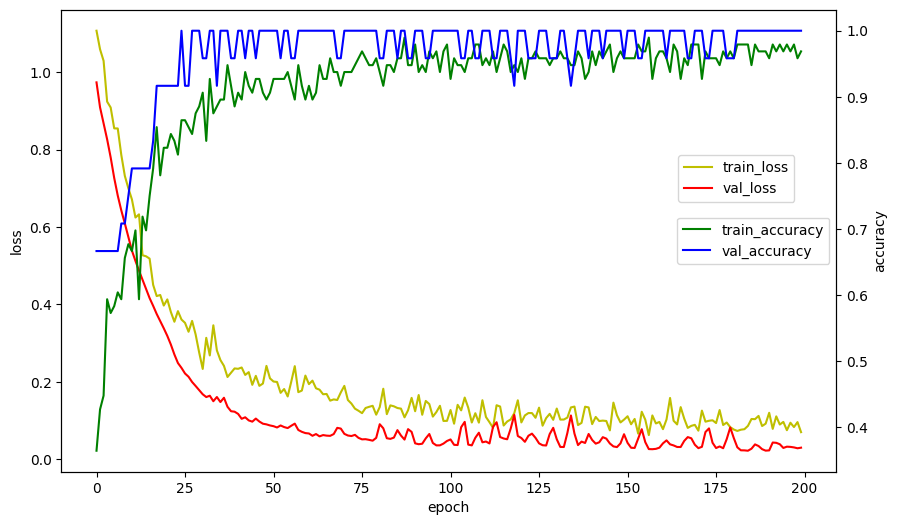

In [14]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [18]:
# 모델 평가
loss_and_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc[0]:.4f}, accuracy:{loss_and_acc[1]:.4f}')

loss:0.0094, accuracy:1.0000


In [21]:
model1 = load_model('model/iris-001-loss0.9736-acc0.6667.h5')
loss_and_acc1 =model1.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc1[0]:.4f}, accuracy:{loss_and_acc1[1]:.4f}')

loss:0.9779, accuracy:0.6667


In [22]:
model2 = load_model('model/iris-025-loss0.2361-acc1.0000.h5')
loss_and_acc2 =model2.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc2[0]:.4f}, accuracy:{loss_and_acc2[1]:.4f}')

loss:0.2121, accuracy:1.0000
